<a href="https://colab.research.google.com/github/omerfarukgzl/Projects/blob/main/AnimeFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritma:

 DCGAN to genarate anime face

#Grup:

Ömer Faruk Güzel G191210068 2A

Muhammed Talha Ergün G191210002 2A

Emre Özel B191210086 1A


#Dataset Adı:

Anime Face Dataset

#Dataset Linkleri:

https://www.kaggle.com/datasets/splcher/animefacedataset


https://www.kaggle.com/datasets/soumikrakshit/anime-faces


<a href="https://colab.research.google.com/github/furkantkts/Asp.Net-Core-K-t-phane-Sistemi/blob/main/%C3%B6merson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install jovian --upgrade -q
import jovian
jovian.set_project('dcgan-anime-faces')
jovian.set_colab_id('1W1aptk3dfBhLXkHGBLSSmwvm_3y-liDw')

# Generatif Modellemeye Giriş

Derin sinir ağları esas olarak denetimli öğrenme için kullanılır: sınıflandırma veya regresyon. Bununla birlikte, Üretken Rakip Ağlar organlar sinir ağlarını çok farklı bir amaç için kullanırlar: Üretken modelleme

Üretken modelleme, makine öğreniminde, girdi verilerindeki düzenliliklerin veya kalıpların otomatik olarak keşfedilmesini ve öğrenilmesini içeren denetimsiz bir öğrenme görevidir; böylece model, orijinal veri kümesinden makul bir şekilde çizilebilecek yeni örnekler üretmek veya çıkarmak için kullanılabilir.

Üretken modellerre örnek olarak: https://thispersondoesnotexist.com Sayfayı her yeniden yüklediğinizde, anında bir kişinin yüzünün yeni bir görüntüsü oluşturulur.

<img src="https://imgix.bustle.com/inverse/4b/17/8f/0e/cf91/4506/99c7/e6a491c5d4ac/these-people-are-not-real--they-were-produced-by-our-generator-that-allows-control-over-different-a.png" style="width:480px; margin-bottom:32px"/>

Üretken modelleme için kullanılan birçok yaklaşım olsa da, Üretken bir Rakip Ağ aşağıdaki yaklaşımı benimser:

<img src="https://i.imgur.com/6NMdO9u.png" style="width:420px; margin-bottom:32px"/>

İki sinir ağı vardır: Jeneratör ve  Ayırt Edici . Jeneratör, rastgele bir vektör / matris verilen "sahte" bir örnek üretir. Ayırt edici, belirli bir örneğin "gerçek" (eğitim verilerinden seçilmiş) veya "sahte" (jeneratör tarafından oluşturulmuş) olup olmadığını tespit etmeye çalışır. Eğitim birlikte gerçekleşir. Ayırıcı ve jeneratör birkaç dönem için eğitilir ve tekrar edilir. 

Bu eğitimde, anime karakterlerinin yüzlerinin görüntülerini oluşturmak için tekrar ettik.

<img src="https://i.imgur.com/NaKtJs0.png" width="360" style="margin-bottom:32px"/>


Eğitimde anime yüz veri kümesi için kullanılacak iki ayrı veri kümesi 
: 

https://www.kaggle.com/datasets/splcher/animefacedataset


https://www.kaggle.com/datasets/soumikrakshit/anime-faces

In [ ]:
project_name = 'DCGAN-Anime-faces'

## Verileri İndirme

Bu Adımda Kaggle'dan veri kümelerini API dosyasındaki bilgilerimizi( kaggle kullanıcı adı, kaggle anahtar ) kullanarak indirme işlemini gerçekleştiririz.

İlk Kullanılan Veri Kümesi:
(https://www.kaggle.com/datasets/splcher/animefacedataset ) 

İkinci Kullanılan Veri Kümesi:
https://www.kaggle.com/datasets/soumikrakshit/anime-faces


  API Json Dosyası Formatı
```
{"kullanıcı adı":"YOUR_KAGGLE_USERNAME","anahtar":"YOUR_KAGGLE_KEY"}
```



In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/soumikrakshit/anime-faces/code'
od.download(dataset_url)

Veri kümesi, ilk eğitim için kullanılacak veri kümesi png biçimdinde 21.000 'den fazla  ikinci eğitim için kullanılacak veri kümesi JPG biçimindeki 63.000'den fazla görüntüye görüntüye sahiptir.

In [ ]:
import os

DATA_DIR = './anime-faces'
print(os.listdir(DATA_DIR))

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
print(os.listdir(DATA_DIR+'/data')[:10])
print(len(os.listdir(DATA_DIR+'/data')))
print(os.listdir(DATA_DIR+'/data')[0])
img = cv2.imread(DATA_DIR+'/data/10.png')
print(img.shape)
plt.imshow(img)

Bu veri kümesini `torchvision` dan ImageFolder sınıfını kullanarak yükledik.  Görüntüleri 64x64px'e yeniden boyutlandırdık ve kırptık. Piksel değerlerini her kanal için ortalama ve standart sapma 0,5 ile normalleştirdik. Bu, piksel değerlerinin ayırıcıyı eğitmek için daha uygun olan `(-1, 1)` aralığında olmasını sağlayacak.

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [ ]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)

Görüntü tensörlerini normalleştirmek ve bir eğitim grubundan bazı örnek görüntüleri görüntülemek için işlevler oluşturduk.

In [ ]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [ ]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

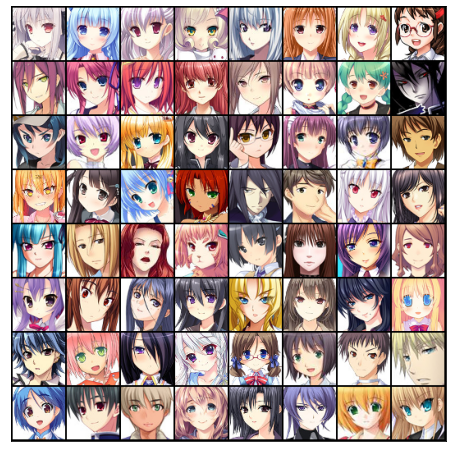

In [ ]:
show_batch(train_dl)

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name, environment=None)

## GPU kullanma

Bir gpu'yu sorunsuz bir şekilde kullanmak için, modelimizi ve verilerimizi GPU'ya taşımak için birkaç yardımcı işlev tanımladık.

In [ ]:
def get_default_device():
    
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Tensörleri seçilen cihaza taşı"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Verileri bir aygıta taşımak için veri yükleyiciyi sarma"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Cihaza taşıdıktan sonra bir toplu veri elde etme"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Parti Sayısı"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

Eğitim veri yükleyicimizi, veri yığınlarını otomatik olarak GPU'ya aktarmak için `DeviceDataLoader` kullanarak taşıdık.

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)

## Discriminator Ağı

Ayırt edici bir görüntüyü girdi olarak alır ve onu "gerçek" veya "oluşturulmuş" olarak sınıflandırmaya çalışır. Bu anlamda, diğer sinir ağları gibi. Her görüntü için tek bir sayı çıktısı veren bir konvolüsyonel sinir ağları (CNN) kullandık.



In [ ]:
import torch.nn as nn

In [ ]:
discriminator = nn.Sequential(
    # 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    #  64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    #  128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    #  256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    #  512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    #  1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

Ayrımcı için Sızdıran ReLU aktivasyonunu kullandık.

<img src="https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png" width="420">


> Normal ReLU fonksiyonundan farklı olarak, Sızdıran ReLU negatif değerler için küçük bir gradyan sinyalinin geçmesine izin verir. Sonuç olarak, ayırıcıdan gelen degradelerin jeneratöre daha güçlü akmasını sağlar. Arka destek geçişinde 0'lık bir eğim geçirmek yerine, küçük bir negatif degrade geçirir.  
(https://sthalles.github.io/advanced_gans)

Diğer herhangi bir ikili sınıflandırma modelinde olduğu gibi, ayırıcının çıktısı 0 ile 1 arasında tek bir sayıdır; bu, giriş görüntüsünün gerçek olma olasılığı olarak yorumlanabilir, yani orijinal veri kümesinden seçilir.

Ayırt edici modeli seçilen cihaza taşıyalım.

In [ ]:
discriminator = to_device(discriminator, device)

## Jeneratör Ağı

Üretecin girişi tipik olarak bir görüntü oluşturmak için bir vektör veya rasgele sayı matrisidir (gizli tensör). Jeneratör, `(128, 1, 1)` şeklindeki gizli bir tensörü `3 x 28 x 28' şeklindeki bir görüntü tensörüne dönüştürecektir. Bunu yapmak için, Pytorch'tan 'ConvTranspose2d' katmanını kullandık

![](https://i.imgur.com/DRvK546.gif )

In [ ]:
latent_size = 128

In [ ]:
generator = nn.Sequential(
    

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    #  512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    #  256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    #  128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    #  64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    #  3 x 64 x 64
)

Jeneratörün çıkış katmanı için TanH aktivasyon fonksiyonunu kullandık.

<img src="https://mathworld.wolfram.com/images/interactive/TanhReal.gif" width="420" >

> "ReLU aktivasyonu (Nair & Hinton, 2010) jeneratörde Tanh fonksiyonunu kullanan çıkış katmanı haricinde kullanılır. Sınırlı bir aktivasyon kullanmanın, modelin eğitim dağılımının renk alanını doyurmak ve kaplamak için daha hızlı öğrenmesine izin verdiğini gözlemledik. Ayırımcı içinde sızdıran düzeltilmiş aktivasyonu bulduk (Maas ve ark., 2013)

 (https://stackoverflow.com/questions/41489907/generative-adversarial-networks-tanh )



torch.Size([128, 3, 64, 64])


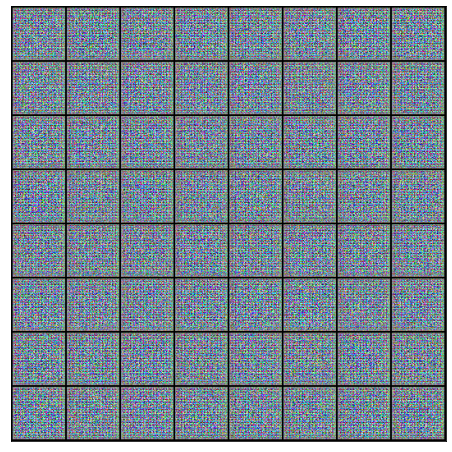

In [ ]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

jeneratör henüz eğitilmediği için  gelen çıktı temelde rastgeledir

Jeneratör seçilen cihaza taşınır.

In [ ]:
generator = to_device(generator, device)

## Ayrımcılık Eğitimi

Ayırt edici bir ikili sınıflandırma modeli olduğundan, gerçek ve üretilen görüntüler arasında ne kadar iyi ayrım yapabildiğini ölçmek için ikili çapraz entropi kaybı işlevini kullanılır.

<<img src="https://i.stack.imgur.com/HlYNr.png" width="420" >

In [ ]:
def train_discriminator(real_images, opt_d):
    # Ayırıcı gradyanları temizle
    opt_d.zero_grad()

    # Gerçek görüntüleri ayırıcıdan geçirin
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Sahte görüntüler oluştur
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Sahte görüntüleri ayırıcıdan geçirme
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Diskriminatör ağırlıklarını güncelle
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

Ayırımcı eğitme adımları:

- Görüntü gerçek MNIST veri kümesinden seçildiyse ayırıcının 1, jeneratör ağı kullanılarak oluşturulduysa 0 çıktı vermesini beklenir.

- Önce bir grup gerçek görüntü akatarılır ve kayıp hesaplanır, hedef etiketleri 1 olarak ayarlanır.

- Daha sonra bir grup sahte görüntü (jeneratör kullanılarak oluşturulan) ayırıcıya aktarılır  ve hedef etiketleri 0'a ayarlanarak kayıp hesaplanır.

- Son olarak, iki kayıp eklenir ve ayırıcının ağırlıklarını ayarlamak için gradyan inişini gerçekleştirmek için toplam kayıp  kullanılır.


## Jeneratör Eğitimi

Jeneratörün çıktıları görüntü olduğundan, jeneratörü nasıl eğitebileceğimiz belli değil. Burada ayırıcıyı kayıp fonksiyonunun bir parçası olarak kullandık. 

- Jeneratörü kullanarak bir dizi görüntü ürettik, ayırıcıya aktardık.

- Hedef etiketleri 1 yani gerçek olarak ayarlayarak kaybı hesapladık.

- Gerçek benzeri görüntüler elde etmek için Jeneratörün ağırlıklarını değiştirdk

In [ ]:
def train_generator(opt_g):
    # Jeneratör gradyanlarını temizle
    opt_g.zero_grad()
    
    # Sahte görüntüler oluştur
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Ayrımcıyı kandırmaya çalış
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Jeneratör ağırlıklarını güncelle
    loss.backward()
    opt_g.step()
    
    return loss.item()

Modelin ilerleyişini görsel olarak incelemek için ara çıktıları kaydedebileceğimiz bir dizin oluşturduk. Oluşturulan görüntüleri de dışa aktarmak için bir yardımcı işlev oluşturduk.

In [ ]:
from torchvision.utils import save_image

In [ ]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [ ]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

Modeli eğitirken bireysel olarak üretilen görüntülerin zaman içinde nasıl geliştiğini görmek için sabit bir giriş vektörü kümesi kullandık. Modelimizi eğitmeye başlamadan önce küme görüntüyü kaydettik.

In [ ]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

In [ ]:
save_samples(0, fixed_latent)

In [ ]:
jovian.commit(project=project_name, environment=None)

## Tam Eğitim Döngüsü

Her bir eğitim verisi grubu için ayırıcıyı ve üreteci birlikte eğitmek için bir `uyum` işlevi tanımlayalım. Adam optimizer'ı, Hayranlar için iyi çalıştığı bilinen bazı özel parametrelerle (beta'lar) kullanacağız. Ayrıca, muayene için düzenli aralıklarla oluşturulan bazı örnek görüntüleri de kaydedeceğiz.

<img src="https://i.imgur.com/6NMdO9u.png " style =" maksimum genişlik: 420px; kenar boşluğu alt: 32px"/>

In [ ]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [ ]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Kayıplar ve puanlar
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Optimize ediciler oluşturma
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            
            loss_g = train_generator(opt_g)
            
        # Kayıplar ve puanları Kaydet
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Günlük kayıpları ve puanları
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Oluşturulan görüntüleri kaydetme
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

Model Eğitime hazırdır ve Jeneratör ve ayırt edici arasındaki dengeyi koruyup koruyamayacağınızı görmek için farklı öğrenme oranları denedik.

In [ ]:
lr = 0.0002
epochs = 25

In [ ]:
jovian.reset()
jovian.log_hyperparams(lr=lr, epochs=epochs)

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Hyperparams logged.


In [ ]:
history = fit(epochs, lr)

  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [1/25], loss_g: 3.2306, loss_d: 0.5071, real_score: 0.8396, fake_score: 0.2534
Saving generated-images-0001.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [2/25], loss_g: 5.5111, loss_d: 0.4950, real_score: 0.8168, fake_score: 0.2145
Saving generated-images-0002.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [3/25], loss_g: 5.3843, loss_d: 0.5189, real_score: 0.8466, fake_score: 0.2533
Saving generated-images-0003.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [4/25], loss_g: 4.7983, loss_d: 0.2345, real_score: 0.8764, fake_score: 0.0828
Saving generated-images-0004.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [5/25], loss_g: 10.1972, loss_d: 0.5730, real_score: 0.9610, fake_score: 0.3718
Saving generated-images-0005.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [6/25], loss_g: 5.2044, loss_d: 0.2931, real_score: 0.8802, fake_score: 0.1153
Saving generated-images-0006.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [7/25], loss_g: 4.7005, loss_d: 0.3551, real_score: 0.8173, fake_score: 0.0901
Saving generated-images-0007.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [8/25], loss_g: 4.5661, loss_d: 0.2358, real_score: 0.8605, fake_score: 0.0556
Saving generated-images-0008.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [9/25], loss_g: 11.3608, loss_d: 0.5380, real_score: 0.9322, fake_score: 0.3271
Saving generated-images-0009.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [10/25], loss_g: 8.0198, loss_d: 0.2843, real_score: 0.9432, fake_score: 0.1722
Saving generated-images-0010.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [11/25], loss_g: 6.4218, loss_d: 0.2580, real_score: 0.9622, fake_score: 0.1672
Saving generated-images-0011.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [12/25], loss_g: 10.7114, loss_d: 0.6097, real_score: 0.9407, fake_score: 0.3435
Saving generated-images-0012.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [13/25], loss_g: 5.2848, loss_d: 0.2544, real_score: 0.9047, fake_score: 0.1202
Saving generated-images-0013.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [14/25], loss_g: 5.3545, loss_d: 0.2308, real_score: 0.9350, fake_score: 0.1216
Saving generated-images-0014.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [15/25], loss_g: 8.9623, loss_d: 0.4429, real_score: 0.9996, fake_score: 0.3046
Saving generated-images-0015.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [16/25], loss_g: 5.5946, loss_d: 0.1219, real_score: 0.9141, fake_score: 0.0203
Saving generated-images-0016.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [17/25], loss_g: 14.4704, loss_d: 1.1727, real_score: 0.9981, fake_score: 0.5736
Saving generated-images-0017.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [18/25], loss_g: 4.5224, loss_d: 0.1689, real_score: 0.9496, fake_score: 0.0959
Saving generated-images-0018.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [19/25], loss_g: 4.5408, loss_d: 0.1840, real_score: 0.9110, fake_score: 0.0723
Saving generated-images-0019.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [20/25], loss_g: 2.8086, loss_d: 0.1861, real_score: 0.8655, fake_score: 0.0135
Saving generated-images-0020.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [21/25], loss_g: 4.9030, loss_d: 0.1525, real_score: 0.9296, fake_score: 0.0636
Saving generated-images-0021.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [22/25], loss_g: 5.9461, loss_d: 0.1750, real_score: 0.9720, fake_score: 0.1060
Saving generated-images-0022.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [23/25], loss_g: 4.0128, loss_d: 0.0705, real_score: 0.9648, fake_score: 0.0307
Saving generated-images-0023.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [24/25], loss_g: 4.4417, loss_d: 0.1168, real_score: 0.9135, fake_score: 0.0169
Saving generated-images-0024.png


  0%|          | 0/337 [00:00<?, ?it/s]

Epoch [25/25], loss_g: 4.1396, loss_d: 0.1163, real_score: 0.9171, fake_score: 0.0203
Saving generated-images-0025.png


In [ ]:
losses_g, losses_d, real_scores, fake_scores = history

In [ ]:
jovian.log_metrics(loss_g=losses_g[-1], 
                   loss_d=losses_d[-1], 
                   real_score=real_scores[-1], 
                   fake_score=fake_scores[-1])

[jovian] Metrics logged.


In [ ]:
# Model kontrol noktalarını kaydetme
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

Eğitimin 1., 5. ve 10. bölümlerinde  sonra oluşturulan görüntüler aşağıdaki gibi görünür.

In [ ]:
from IPython.display import Image

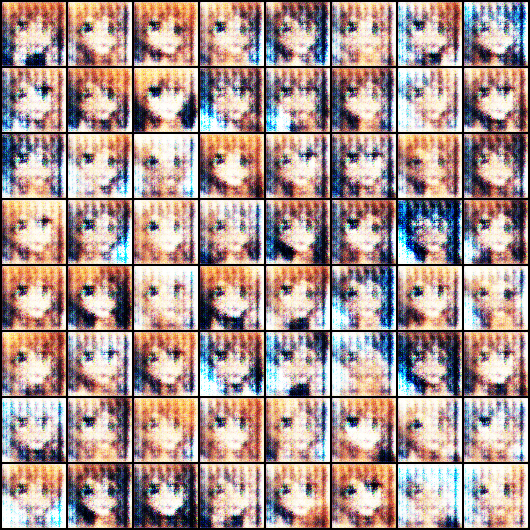

In [ ]:
Image('./generated/generated-images-0001.png')

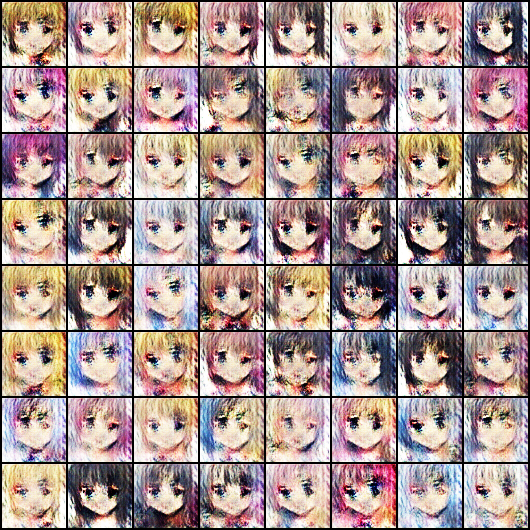

In [ ]:
Image('./generated/generated-images-0005.png')

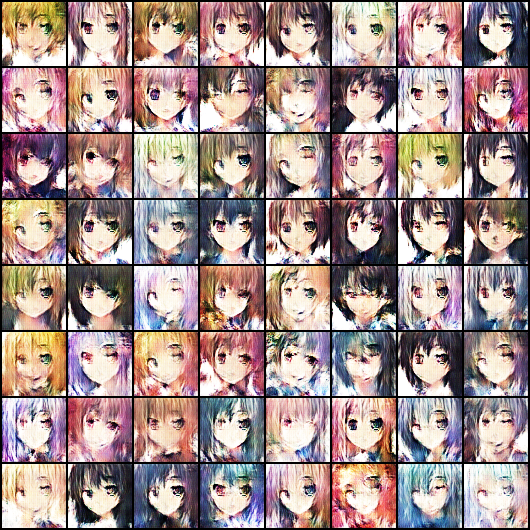

In [ ]:
Image('./generated/generated-images-0010.png')

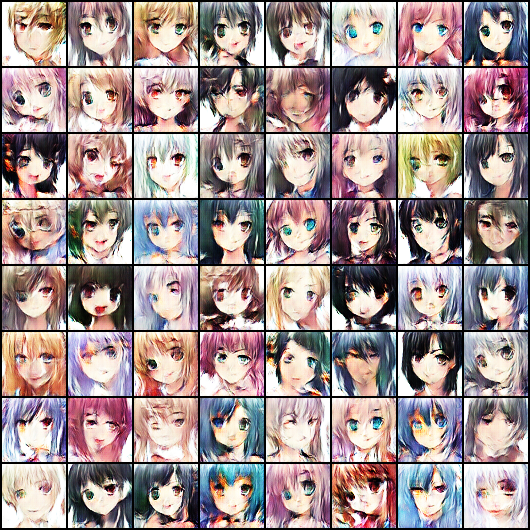

In [ ]:
Image('./generated/generated-images-0020.png')

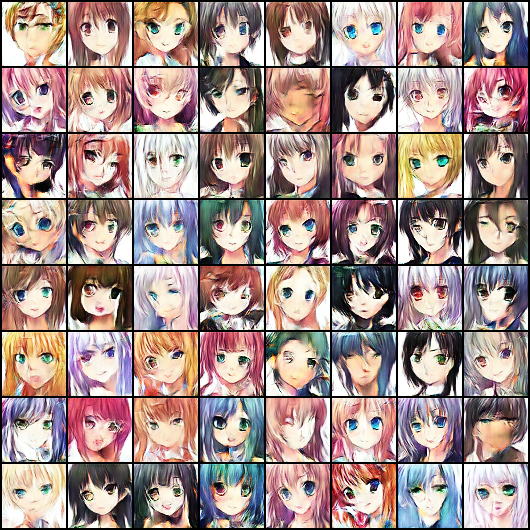

In [ ]:
Image('./generated/generated-images-0025.png')

In [ ]:
import cv2
import os

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
out.release()

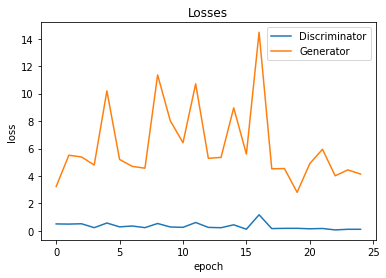

In [ ]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

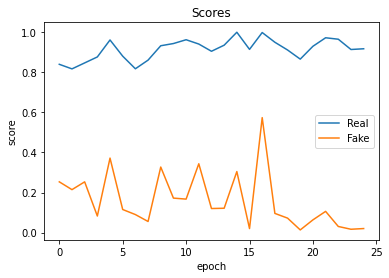

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name, 
              outputs=['G.pth', 'D.pth', 'gans_training.avi'], 
              environment=None)